# Boston Housing
## Lasso

Uses Boston housing dataset from the rdatasets package. More infomration found here: https://pypi.org/project/rdatasets/. 

#### Import modules and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

#### Load and view the data

In [2]:
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = pd.Series(data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Take a quick look at the correlation matrix. 

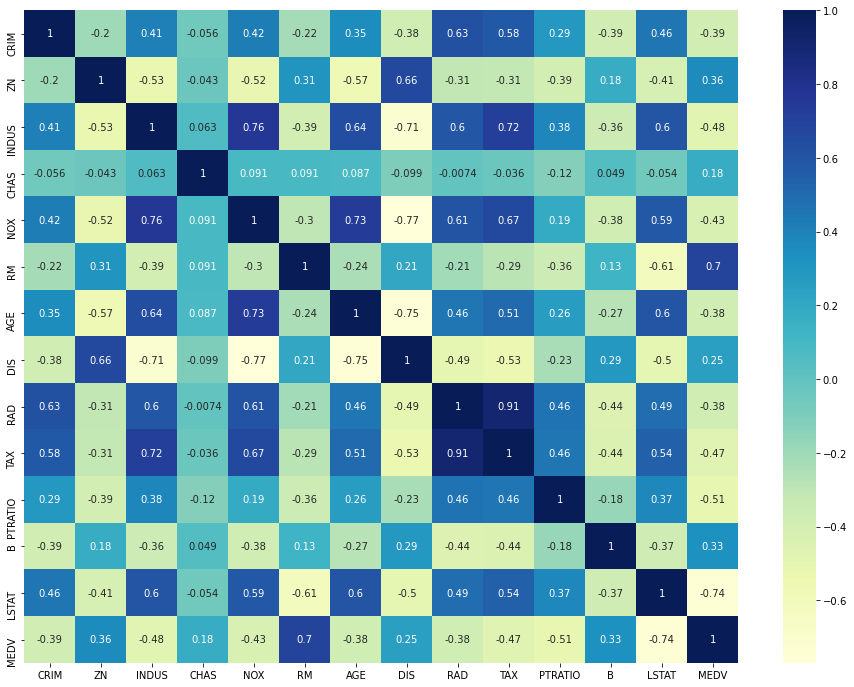

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(data=corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

#### Split the dataset into train and test sets

In [6]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)

In [7]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52,17.1
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69,23.1
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65,28.4
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9


#### Preparation

In [8]:
X_train = train_set.drop('MEDV', axis=1)
y_train = train_set['MEDV'].copy()
X_test = test_set.drop('MEDV', axis=1)
y_test = test_set['MEDV'].copy()

The `Pipeline` function can be used to apply data transformations, and is useful to ensure transformations are applied consistently across multple datasets. Below I've speified an imputation method for missing data, and standardized features by removing the mean and scaling to unit variance.

In [9]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [10]:
# Impute (median) and scale the data
X_train_tr = pipeline.fit_transform(X_train)
X_test_tr = pipeline.transform(X_test)

***
#### Model

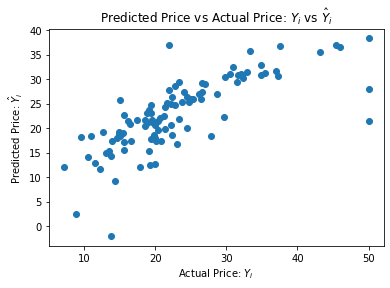

Lasso(alpha=0.5)
Model Evaluation
    RMSE:  5.913557503154705
    r2:    0.5773270922492962
Intercept:  22.374752475247536
Coefficients: 
 [-0.12735419  0.         -0.          0.         -0.          3.29461057
 -0.         -0.24534789 -0.         -0.04969048 -1.55360558  0.29203221
 -3.74484148]


In [11]:
alpha = 0.5
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_tr, y_train)
pred_lasso_train = lasso.predict(X_train_tr)
pred_lasso = lasso.predict(X_test_tr)

plt.scatter(y_test, pred_lasso)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_lasso))
r2_lasso = r2_score(y_test, pred_lasso)
print(lasso)
print('Model Evaluation')
print('    RMSE: ', rmse_lasso)
print('    r2:   ', r2_lasso)

# Intercept + coefficients
print('Intercept: ', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)

#### Using grid search to find an appropriate value for `alpha`

The `model_selection.GridSearchCV` performs an exhaustive search over specified parameter values for an estimator. In this case, the search will fit a model for 100 values from 0 to 1 (increment by 0.01) to determine the highest scoring parameter.

In [12]:
lasso = Lasso()

# define the parameters (grid)
parameters = {'alpha':np.arange(0, 1, 0.01)}

# define the grid search parameters
lasso_grid = GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error')

# fit the data
result = lasso_grid.fit(X_train_tr, y_train)

# # Print results
print('Score', result.best_score_)
print('Config: ', result.best_params_)


/Users/brandoncrow/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/brandoncrow/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/brandoncrow/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3193.724614302674, tolerance: 2.6755166439628484
  model = cd_fast.enet_coordinate_descent(
/Users/brandoncrow/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does 

Score -4.709632055301431
Config:  {'alpha': 0.04}
